##Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

In [2]:
trainData = pd.read_csv('train.csv', skipinitialspace = True)
trainData

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
trainData.replace("?", '0', inplace = True)

In [4]:
print(trainData.isna().sum())

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [5]:
trainData = trainData.dropna()

In [6]:
trainData.isnull().values.any()

False

In [7]:
trainData = trainData.drop(['education'], axis=1)
trainData.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
print("value distribution in sex attribute: \n",trainData['sex'].value_counts())
print("\nvalue distribution in income label: \n", trainData['income'].value_counts())

value distribution in sex attribute: 
 Male      21790
Female    10771
Name: sex, dtype: int64

value distribution in income label: 
 <=50K    24720
>50K      7841
Name: income, dtype: int64


#Splitting Training Dataset

In [9]:
X = trainData.drop('income',axis=1)
y = trainData['income']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)
X_train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19336,46,State-gov,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,38,United-States
985,63,Private,11,Divorced,Other-service,Not-in-family,White,Female,0,0,20,United-States
12675,22,Private,10,Divorced,Sales,Own-child,Asian-Pac-Islander,Female,0,0,30,Philippines
15967,24,Private,9,Married-civ-spouse,Protective-serv,Husband,Asian-Pac-Islander,Male,0,0,40,Thailand
32031,35,Private,4,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,Mexico


#Converting categorical Data into numerical data using OrdinalEncoder

In [11]:
print(X_train['race'].value_counts())
print(X_test['race'].value_counts())

White                 23617
Black                  2681
Asian-Pac-Islander      898
Amer-Indian-Eskimo      253
Other                   227
Name: race, dtype: int64
White                 4199
Black                  443
Asian-Pac-Islander     141
Amer-Indian-Eskimo      58
Other                   44
Name: race, dtype: int64


In [12]:
# converting race into two groups only: white(1) and others(0)
#changing X_train
X_train['race'] = [1 if r=='White' else 0 for r in X_train['race']]
X_train['sex'] = [1 if r=='Male' else 0 for r in X_train['sex']]

#changing X_test
X_test['race'] = [1 if r=='White' else 0 for r in X_test['race']]
X_test['sex'] = [1 if r=='Male' else 0 for r in X_test['sex']]
X_train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19336,46,State-gov,9,Separated,Adm-clerical,Unmarried,1,0,0,0,38,United-States
985,63,Private,11,Divorced,Other-service,Not-in-family,1,0,0,0,20,United-States
12675,22,Private,10,Divorced,Sales,Own-child,0,0,0,0,30,Philippines
15967,24,Private,9,Married-civ-spouse,Protective-serv,Husband,0,1,0,0,40,Thailand
32031,35,Private,4,Married-civ-spouse,Tech-support,Husband,1,1,0,0,40,Mexico


In [13]:
# whites are in majority in the data
X_train['race'].value_counts()

1    23617
0     4059
Name: race, dtype: int64

In [14]:
oe = OrdinalEncoder()
#encoding train and test data
X_train[['workclass','marital-status','occupation','relationship','native-country']] = oe.fit_transform(X_train[['workclass','marital-status','occupation','relationship','native-country']])
X_test[['workclass','marital-status','occupation','relationship','native-country']] = oe.transform(X_test[['workclass','marital-status','occupation','relationship','native-country']])

#encoding train and test predictions
y_train.replace({'<=50K':0,'>50K':1},inplace=True)
y_test.replace({'<=50K':0,'>50K':1},inplace=True)

#changing data to integer
X_train = X_train.astype(np.int64)
X_test = X_test.astype(np.int64)

X_train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
19336,46,7,9,5,1,4,1,0,0,0,38,39
985,63,4,11,0,8,1,1,0,0,0,20,39
12675,22,4,10,0,12,3,0,0,0,0,30,30
15967,24,4,9,2,11,0,0,1,0,0,40,37
32031,35,4,4,2,13,0,1,1,0,0,40,26


In [15]:
X_test.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
14160,27,4,10,0,1,1,1,0,0,0,38,39
27048,45,7,9,2,4,5,1,0,0,0,40,39
28868,29,4,13,2,4,0,0,1,0,0,55,39
5667,30,4,13,4,7,1,1,0,0,0,40,39
7827,29,6,10,0,3,1,1,1,2202,0,50,39


In [16]:
#prepare dataframe for fairness metrics
dfMetrics = pd.DataFrame()
dfMetrics['race'] = X_test['race']
dfMetrics['sex'] = X_test['sex']
dfMetrics['labels'] = y_test
dfMetrics.head()

,race,sex,labels
14160,1,0,0
27048,1,0,0
28868,0,1,1
5667,1,0,0
7827,1,1,0


# Feature Scaling

In [17]:
scaler = StandardScaler()
X_train_reduced = scaler.fit_transform(X_train)
X_test_reduced = scaler.transform(X_test)
pd.DataFrame(X_train_reduced).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.546709,2.151029,-0.421024,1.586500,-1.319949,1.590049,0.414569,-1.417362,-0.145402,-0.216957,-0.193362,0.292946
1,1.793611,0.085958,0.355327,-1.739105,0.336728,-0.277443,0.414569,-1.417362,-0.145402,-0.216957,-1.648799,0.292946
2,-1.213623,0.085958,-0.032848,-1.739105,1.283401,0.967552,-2.412142,-1.417362,-0.145402,-0.216957,-0.840223,-0.854588
3,-1.066929,0.085958,-0.421024,-0.408863,1.046732,-0.899940,-2.412142,0.705536,-0.145402,-0.216957,-0.031647,0.037939
4,-0.260110,0.085958,-2.361901,-0.408863,1.520069,-0.899940,0.414569,0.705536,-0.145402,-0.216957,-0.031647,-1.364603


# Fairness Metrics

In [18]:
#Demographic parity
def demographicParity(protectedAttribute, y_test, num_categories):
  #find count of each category of protected attribute
  protectedAttributeCount = [0] * num_categories
  for i in range(num_categories):
    protectedAttributeCount[i] = pd.DataFrame(protectedAttribute).value_counts()[i]
  
  #find the number of predicted 1 in each category of protected attribute
  countPredicted1 = [0] * num_categories
  len = y_test.shape[0]
  print("\nlen of y_test: ", len)
  for j in range(num_categories):  
    for i in range(len):
      if protectedAttribute[i] == j and y_test[i] == 1:
        countPredicted1[j]+=1 
  
  print("count of individual classes: ", protectedAttributeCount)
  print("count of 1's in individual classes: ", countPredicted1)

  disparity = 0
  for i in range(num_categories):
    print("probability for class: ",i, " is: ", countPredicted1[i]/protectedAttributeCount[i])
    disparity = abs(disparity - countPredicted1[i]/protectedAttributeCount[i])

  return abs(disparity)

In [19]:
def fairness_metrics_helper(metricsDF):
    
    #Confusion Matrix
    confusionMatrix =confusion_matrix(metricsDF['labels'],metricsDF['predictions'])
    TN, FP, FN, TP = confusionMatrix.ravel()
    
    # True positive rate
    TPR = TP/(TP+FN)
    
    # False positive rate
    FPR = FP/(FP+TN)
    
    return np.array([TPR, FPR]) 

In [20]:
#calculating equal opportunity
def equalOpportunity(metricsDF,protectedAttribute):
  tpr1 = fairness_metrics_helper(metricsDF[metricsDF[protectedAttribute]==1])[0]
  tpr0 = fairness_metrics_helper(metricsDF[metricsDF[protectedAttribute]==0])[0]
  return abs(tpr1 - tpr0)

In [21]:
#calculating equal odds
def equalizedOdds(df,protectedAttribute):
  result1 = fairness_metrics_helper(df[df[protectedAttribute]==1])
  result0 = fairness_metrics_helper(df[df[protectedAttribute]==0])
  return np.array([abs(result1[0] - result0[0]),abs(result1[1] - result0[1])])

#Decision Tree Classifier

In [22]:
DecisionTree = DecisionTreeClassifier(max_depth=7, random_state=42)
DecisionTree.fit(X_train_reduced, y_train)
dt_predictions = DecisionTree.predict(X_test_reduced)
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3683
           1       0.81      0.54      0.65      1202

    accuracy                           0.86      4885
   macro avg       0.84      0.75      0.78      4885
weighted avg       0.85      0.86      0.85      4885



In [23]:
DecisionTree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=6)
DecisionTree_entropy.fit(X_train_reduced, y_train)
dt_entropy_predictions = DecisionTree_entropy.predict(X_test_reduced)
print(classification_report(y_test,dt_entropy_predictions))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      3683
           1       0.80      0.54      0.65      1202

    accuracy                           0.86      4885
   macro avg       0.84      0.75      0.78      4885
weighted avg       0.85      0.86      0.85      4885



In [24]:
dt_demographicParityGender = demographicParity(X_test['sex'].to_numpy(),dt_predictions,2)
dt_demographicParityRace = demographicParity(X_test['race'].to_numpy(),dt_predictions,2)
print("\nDisparity for attribute gender: ", dt_demographicParityGender, "\nDisparity for attribute race: ", dt_demographicParityRace)


len of y_test:  4885
count of individual classes:  [1573, 3312]
count of 1's in individual classes:  [94, 715]
probability for class:  0  is:  0.059758423394787034
probability for class:  1  is:  0.21588164251207728

len of y_test:  4885
count of individual classes:  [686, 4199]
count of 1's in individual classes:  [89, 720]
probability for class:  0  is:  0.12973760932944606
probability for class:  1  is:  0.17146939747558942

Disparity for attribute gender:  0.15612321911729024 
Disparity for attribute race:  0.04173178814614337


In [25]:
#finding equal opportunity
dfMetrics['predictions'] = pd.DataFrame(dt_predictions).set_index(dfMetrics.index)
dtOpportunityGender = equalOpportunity(dfMetrics,'sex')
dtOpportunityRace = equalOpportunity(dfMetrics,'race')
print("equal opportunity for attribute sex: ", dtOpportunityGender)
print("equal opportunity for attribute race: ", dtOpportunityRace)

#finding equality of odds
dtOddsAttributeGender = equalizedOdds(dfMetrics, 'sex')
dtOddsAttributeRace = equalizedOdds(dfMetrics, 'race')

print("\nequality of odds (true positive) for Gender: ", dtOddsAttributeGender[0])
print("equality of odds (false positive) for Gender: ", dtOddsAttributeGender[1])
print("\nequality of odds (true positive) for race: ", dtOddsAttributeRace[0])
print("equality of odds (false positive) for race: ", dtOddsAttributeRace[1])

equal opportunity for attribute sex:  0.1707193946716128
equal opportunity for attribute race:  0.09512619592392024

equality of odds (true positive) for Gender:  0.1707193946716128
equality of odds (false positive) for Gender:  0.038009207113780585

equality of odds (true positive) for race:  0.09512619592392024
equality of odds (false positive) for race:  0.001091683727106732


# Adaboost

In [26]:
abc = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(), n_estimators=100)
adaBoost = abc.fit(X_train_reduced, y_train)
ab_predictions = adaBoost.predict(X_test_reduced)
print(classification_report(y_test,ab_predictions))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3683
           1       0.68      0.64      0.66      1202

    accuracy                           0.84      4885
   macro avg       0.78      0.77      0.78      4885
weighted avg       0.84      0.84      0.84      4885



In [27]:
adaBoost_demographicParityGender = demographicParity(X_test['sex'].to_numpy(),ab_predictions, 2)
adaBoost_demographicParityRace = demographicParity(X_test['race'].to_numpy(),ab_predictions,2)
print("\nDisparity for attribute Gender: ", adaBoost_demographicParityGender, "\nDisparity for attribute race: ", adaBoost_demographicParityRace)


len of y_test:  4885
count of individual classes:  [1573, 3312]
count of 1's in individual classes:  [164, 957]
probability for class:  0  is:  0.10425937698664971
probability for class:  1  is:  0.28894927536231885

len of y_test:  4885
count of individual classes:  [686, 4199]
count of 1's in individual classes:  [100, 1021]
probability for class:  0  is:  0.1457725947521866
probability for class:  1  is:  0.24315313169802333

Disparity for attribute Gender:  0.18468989837566913 
Disparity for attribute race:  0.09738053694583673


In [28]:
#finding equal opportunity
dfMetrics = dfMetrics.drop('predictions',axis=1)
dfMetrics['predictions'] = pd.DataFrame(ab_predictions).set_index(dfMetrics.index)
abOpportunityGender = equalOpportunity(dfMetrics,'sex')
abOpportunityRace = equalOpportunity(dfMetrics,'race')
print("equal opportunity for attribute Gender: ",abOpportunityGender)
print("equal opportunity for attribute race: ",abOpportunityRace)

#finding equality of odds
abOddsAttributeGender = equalizedOdds(dfMetrics, 'sex')
abOddsAttributeRace = equalizedOdds(dfMetrics, 'race')

print("\nequality of odds (true positive) for Gender: ", abOddsAttributeGender[0])
print("equality of odds (false positive) for Gender: ", abOddsAttributeGender[1])
print("\nequality of odds (true positive) for race: ", abOddsAttributeRace[0])
print("equality of odds (false positive) for race: ", abOddsAttributeRace[1])

equal opportunity for attribute Gender:  0.10305670415936385
equal opportunity for attribute race:  0.09264379798051192

equality of odds (true positive) for Gender:  0.10305670415936385
equality of odds (false positive) for Gender:  0.07457812194141145

equality of odds (true positive) for race:  0.09264379798051192
equality of odds (false positive) for race:  0.026566148398163014


#Random Forest Classifier

In [29]:
pd.DataFrame(y_test).value_counts()

income
0         3683
1         1202
dtype: int64

In [30]:
randomForest = RandomForestClassifier(max_depth = 15, n_estimators=150,random_state=42, class_weight={0:1, 1:1.5}, criterion='entropy')
randomForest.fit(X_train_reduced, y_train)
rf_predictions = randomForest.predict(X_test_reduced)
print(classification_report(y_test,rf_predictions))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      3683
           1       0.75      0.71      0.73      1202

    accuracy                           0.87      4885
   macro avg       0.83      0.82      0.82      4885
weighted avg       0.87      0.87      0.87      4885



In [31]:
print("labels: ",y_test.value_counts())
print("predictions: ", pd.DataFrame(rf_predictions).value_counts())

labels:  0    3683
1    1202
Name: income, dtype: int64
predictions:  0    3753
1    1132
dtype: int64


Using GridCV to find best parameters for Random Forest Classifier

In [32]:
#selecting the best parameters for random forest classifier
param_grid = { 
    'n_estimators': [50,100, 150],
    'max_depth' : [5,6,7,8,10,15,32],
    'criterion' :['gini', 'entropy']
}
cv = GridSearchCV(randomForest,param_grid=param_grid,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 1.5},
                                              criterion='entropy', max_depth=15,
                                              n_estimators=150,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 10, 15, 32],
                         'n_estimators': [50, 100, 150]})

In [33]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 15, 'n_estimators': 150}

In [34]:
rf_demographicParityGender = demographicParity(X_test['sex'].to_numpy(),rf_predictions,2)
rf_demographicParityRace = demographicParity(X_test['race'].to_numpy(),rf_predictions,2)
print("\nDisparity for attribute Gender: ", rf_demographicParityGender, "\nDisparity for attribute race: ", rf_demographicParityRace)


len of y_test:  4885
count of individual classes:  [1573, 3312]
count of 1's in individual classes:  [136, 996]
probability for class:  0  is:  0.08645899554990465
probability for class:  1  is:  0.3007246376811594

len of y_test:  4885
count of individual classes:  [686, 4199]
count of 1's in individual classes:  [102, 1030]
probability for class:  0  is:  0.14868804664723032
probability for class:  1  is:  0.2452964991664682

Disparity for attribute Gender:  0.21426564213125476 
Disparity for attribute race:  0.09660845251923789


In [35]:
#finding equal opportunity
dfMetrics = dfMetrics.drop('predictions',axis=1)
dfMetrics['predictions'] = pd.DataFrame(rf_predictions).set_index(dfMetrics.index)

rfOpportunityGender = equalOpportunity(dfMetrics,'sex')
rfOpportunityRace = equalOpportunity(dfMetrics,'race')
print("equal opportunity for attribute Gender: ",rfOpportunityGender)
print("equal opportunity for attribute race: ",rfOpportunityRace)

#finding equality of odds
rfOddsAttributeGender = equalizedOdds(dfMetrics, 'sex')
rfOddsAttributeRace = equalizedOdds(dfMetrics, 'race')

print("\nequality of odds (true positive) for Gender: ", rfOddsAttributeGender[0])
print("equality of odds (false positive) for Gender: ", rfOddsAttributeGender[1])
print("\nequality of odds (true positive) for race: ", rfOddsAttributeRace[0])
print("equality of odds (false positive) for race: ", rfOddsAttributeRace[1])

equal opportunity for attribute Gender:  0.164077344995207
equal opportunity for attribute race:  0.020415735399348045

equality of odds (true positive) for Gender:  0.164077344995207
equality of odds (false positive) for Gender:  0.07827641479167044

equality of odds (true positive) for race:  0.020415735399348045
equality of odds (false positive) for race:  0.027471919437835446


#Logistic Regression

In [36]:
#classifying using logistic regression
logisticRegr = LogisticRegression(random_state = 27)
logisticRegr.fit(X_train_reduced, y_train)
logistic_predictions = logisticRegr.predict(X_test_reduced)
print(classification_report(y_test,logistic_predictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3683
           1       0.72      0.46      0.56      1202

    accuracy                           0.82      4885
   macro avg       0.78      0.70      0.73      4885
weighted avg       0.81      0.82      0.81      4885



In [37]:
logistic_demographicParityGender = demographicParity(X_test['sex'].to_numpy(),logistic_predictions,2)
logistic_demographicParityRace = demographicParity(X_test['race'].to_numpy(),logistic_predictions,2)
print("\nDisparity for attribute Gender: ", logistic_demographicParityGender, "\nDisparity for attribute race: ", logistic_demographicParityRace)


len of y_test:  4885
count of individual classes:  [1573, 3312]
count of 1's in individual classes:  [45, 721]
probability for class:  0  is:  0.028607755880483154
probability for class:  1  is:  0.21769323671497584

len of y_test:  4885
count of individual classes:  [686, 4199]
count of 1's in individual classes:  [56, 710]
probability for class:  0  is:  0.08163265306122448
probability for class:  1  is:  0.16908787806620623

Disparity for attribute Gender:  0.1890854808344927 
Disparity for attribute race:  0.08745522500498175


In [38]:
#finding equal opportunity
dfMetrics = dfMetrics.drop('predictions',axis=1)
dfMetrics['predictions'] = pd.DataFrame(logistic_predictions).set_index(dfMetrics.index)

logOpportunityGender = equalOpportunity(dfMetrics,'sex')
logOpportunityRace = equalOpportunity(dfMetrics,'race')
print("equal opportunity for attribute sex: ",logOpportunityGender)
print("equal opportunity for attribute race: ",logOpportunityRace)

#finding equality of odds
logOddsAttributeGender = equalizedOdds(dfMetrics, 'sex')
logOddsAttributeRace = equalizedOdds(dfMetrics, 'race')

print("\nequality of odds (true positive) for Gender: ", logOddsAttributeGender[0])
print("equality of odds (false positive) for Gender: ", logOddsAttributeGender[1])
print("\nequality of odds (true positive) for race: ", logOddsAttributeRace[0])
print("equality of odds (false positive) for race: ", logOddsAttributeRace[1])

equal opportunity for attribute sex:  0.3386537796155438
equal opportunity for attribute race:  0.06781981854642793

equality of odds (true positive) for Gender:  0.3386537796155438
equality of odds (false positive) for Gender:  0.07495336092173704

equality of odds (true positive) for race:  0.06781981854642793
equality of odds (false positive) for race:  0.038141979748796545


#KNN

In [39]:
knn = KNeighborsClassifier(n_neighbors=10).fit(X_train_reduced,y_train)
knn_predictions=knn.predict(X_test_reduced)
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3683
           1       0.74      0.56      0.64      1202

    accuracy                           0.84      4885
   macro avg       0.81      0.75      0.77      4885
weighted avg       0.84      0.84      0.84      4885



In [40]:
knn_demographicParityGender = demographicParity(X_test['sex'].to_numpy(),knn_predictions,2)
knn_demographicParityRace = demographicParity(X_test['race'].to_numpy(),knn_predictions,2)
print("\nDisparity for attribute Gender: ", knn_demographicParityGender, "\nDisparity for attribute race: ", knn_demographicParityRace)


len of y_test:  4885
count of individual classes:  [1573, 3312]
count of 1's in individual classes:  [88, 820]
probability for class:  0  is:  0.055944055944055944
probability for class:  1  is:  0.24758454106280192

len of y_test:  4885
count of individual classes:  [686, 4199]
count of 1's in individual classes:  [63, 845]
probability for class:  0  is:  0.09183673469387756
probability for class:  1  is:  0.20123839009287925

Disparity for attribute Gender:  0.19164048511874598 
Disparity for attribute race:  0.1094016553990017


In [41]:
#finding equal opportunity
dfMetrics = dfMetrics.drop('predictions',axis=1)
dfMetrics['predictions'] = pd.DataFrame(knn_predictions).set_index(dfMetrics.index)

knnOpportunityGender = equalOpportunity(dfMetrics,'sex')
knnOpportunityRace = equalOpportunity(dfMetrics,'race')
print("equal opportunity for attribute Gender: ",knnOpportunityGender)
print("equal opportunity for attribute race: ",knnOpportunityRace)

#finding equality of odds
knnOddsAttributeGender = equalizedOdds(dfMetrics, 'sex')
knnOddsAttributeRace = equalizedOdds(dfMetrics, 'race')

print("\nequality of odds (true positive) for Gender: ", knnOddsAttributeGender[0])
print("equality of odds (false positive) for Gender: ", knnOddsAttributeGender[1])
print("\nequality of odds (true positive) for race: ", knnOddsAttributeRace[0])
print("equality of odds (false positive) for race: ", knnOddsAttributeRace[1])

equal opportunity for attribute Gender:  0.2388131661193073
equal opportunity for attribute race:  0.157592515702713

equality of odds (true positive) for Gender:  0.2388131661193073
equality of odds (false positive) for Gender:  0.07105306442040274

equality of odds (true positive) for race:  0.157592515702713
equality of odds (false positive) for race:  0.03440436009516959


#SVM

In [42]:
#classifying using linear SVM
classifier = LinearSVC(random_state = 27, max_iter=3000)
classifier.fit(X_train_reduced, y_train)
svm_predictions = classifier.predict(X_test_reduced)
print(classification_report(y_test,svm_predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3683
           1       0.74      0.42      0.54      1202

    accuracy                           0.82      4885
   macro avg       0.79      0.69      0.72      4885
weighted avg       0.81      0.82      0.80      4885



In [43]:
svm_demographicParityGender = demographicParity(X_test['sex'].to_numpy(),svm_predictions,2)
svm_demographicParityRace = demographicParity(X_test['race'].to_numpy(),svm_predictions,2)
print("\nDisparity for attribute Gender: ", svm_demographicParityGender, "\nDisparity for attribute race: ", svm_demographicParityRace)


len of y_test:  4885
count of individual classes:  [1573, 3312]
count of 1's in individual classes:  [42, 643]
probability for class:  0  is:  0.02670057215511761
probability for class:  1  is:  0.1941425120772947

len of y_test:  4885
count of individual classes:  [686, 4199]
count of 1's in individual classes:  [56, 629]
probability for class:  0  is:  0.08163265306122448
probability for class:  1  is:  0.14979757085020243

Disparity for attribute Gender:  0.16744193992217707 
Disparity for attribute race:  0.06816491778897794


In [44]:
#finding equal opportunity
dfMetrics = dfMetrics.drop('predictions',axis=1)
dfMetrics['predictions'] = pd.DataFrame(svm_predictions).set_index(dfMetrics.index)

svmOpportunityGender = equalOpportunity(dfMetrics,'sex')
svmOpportunityRace = equalOpportunity(dfMetrics,'race')
print("equal opportunity for attribute Gender: ",svmOpportunityGender)
print("equal opportunity for attribute race: ",svmOpportunityRace)

#finding equality of odds
svmOddsAttributeGender = equalizedOdds(dfMetrics, 'sex')
svmOddsAttributeRace = equalizedOdds(dfMetrics, 'race')

print("\nequality of odds (true positive) for Gender: ", svmOddsAttributeGender[0])
print("equality of odds (false positive) for Gender: ", svmOddsAttributeGender[1])
print("\nequality of odds (true positive) for race: ", svmOddsAttributeRace[0])
print("equality of odds (false positive) for race: ", svmOddsAttributeRace[1])

equal opportunity for attribute Gender:  0.2969466991111792
equal opportunity for attribute race:  0.02869333992950346

equality of odds (true positive) for Gender:  0.2969466991111792
equality of odds (false positive) for Gender:  0.061749013903229615

equality of odds (true positive) for race:  0.02869333992950346
equality of odds (false positive) for race:  0.025883915232667514


# finding attributes correlated to protected features

Text(0.5, 1.0, 'Fig: 6 Correlation of features with features: race and Gender')

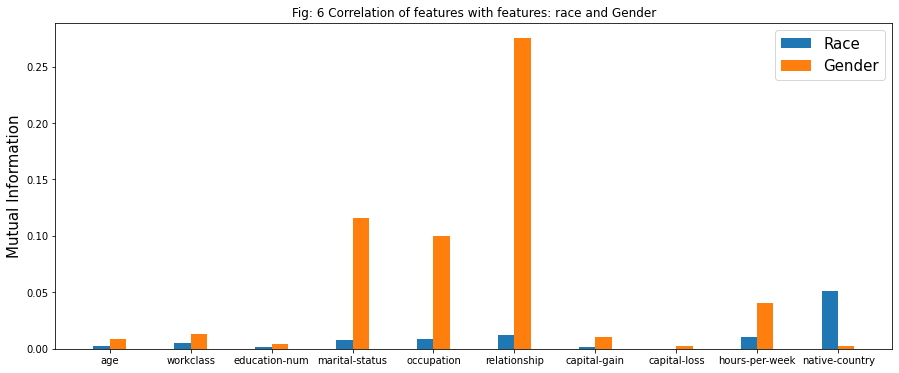

In [45]:
#Mutual information 
tmp = pd.DataFrame()
tmp['race']  = X_train['race']
tmp['sex'] = X_train['sex']

filteredData = X_train
filteredData = filteredData.drop(['race','sex'],axis=1)

#Calcualte mutual information
mut_race = mutual_info_classif(filteredData,tmp['race'],discrete_features=[0,1,2,3,4,5,8,9])
mut_Gender = mutual_info_classif(filteredData,tmp['sex'],discrete_features=[0,1,2,3,4,5,8,9])


#Plot mutual information 
plt.figure(figsize=(15, 6))

labels = ['age', 'workclass', 'education-num','marital-status', 'occupation', 'relationship', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
x = np.arange(len(labels)) 
width = 0.2
plt.bar(x-width/2,height= mut_race,width=width,label='Race')
plt.bar(x+width/2,height= mut_Gender,width=width,label='Gender')
plt.legend(fontsize=15)

plt.ylabel('Mutual Information',size=15)
plt.xticks(ticks=x,labels=labels)
plt.title("Fig: 6 Correlation of features with features: race and Gender")
# we can remove marital-status, occupation, and relationship

# Calculating Fairness Metrics After Removing Sensitive Attributes

In [46]:
X_train_filtered1 = X_train
X_test_filtered1 = X_test
X_train_filtered1 = X_train_filtered1.drop(['race','sex'], axis=1)
X_test_filtered1 = X_test_filtered1.drop(['race','sex'], axis=1)
X_train_filtered1.head()

,age,workclass,education-num,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week,native-country
19336,46,7,9,5,1,4,0,0,38,39
985,63,4,11,0,8,1,0,0,20,39
12675,22,4,10,0,12,3,0,0,30,30
15967,24,4,9,2,11,0,0,0,40,37
32031,35,4,4,2,13,0,0,0,40,26


In [47]:
scaler_filtered1 = StandardScaler()
X_train_filtered1_reduced = scaler_filtered1.fit_transform(X_train_filtered1)
X_test_filtered1_reduced = scaler_filtered1.transform(X_test_filtered1)

In [48]:
randomForestFiltered1 = RandomForestClassifier(max_depth = 15, n_estimators=150,random_state=42, class_weight={0:1, 1:1.5}, criterion='entropy')
randomForestFiltered1.fit(X_train_filtered1_reduced, y_train)
rf_predictions_filtered1 = randomForestFiltered1.predict(X_test_filtered1_reduced)
print(classification_report(y_test,rf_predictions_filtered1))
# less number of 1's are correctly predicted here

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3683
           1       0.74      0.70      0.72      1202

    accuracy                           0.87      4885
   macro avg       0.82      0.81      0.82      4885
weighted avg       0.86      0.87      0.87      4885



In [49]:
rf_demographicParityGender_filtered1 = demographicParity(X_test['sex'].to_numpy(),rf_predictions_filtered1,2)
rf_demographicParityRace_filtered1 = demographicParity(X_test['race'].to_numpy(),rf_predictions_filtered1,2)
print("\nDisparity for attribute Gender: ", rf_demographicParityGender_filtered1, "\nDisparity for attribute race: ", rf_demographicParityRace_filtered1)


len of y_test:  4885
count of individual classes:  [1573, 3312]
count of 1's in individual classes:  [139, 995]
probability for class:  0  is:  0.08836617927527018
probability for class:  1  is:  0.30042270531400966

len of y_test:  4885
count of individual classes:  [686, 4199]
count of 1's in individual classes:  [104, 1030]
probability for class:  0  is:  0.15160349854227406
probability for class:  1  is:  0.2452964991664682

Disparity for attribute Gender:  0.21205652603873948 
Disparity for attribute race:  0.09369300062419414


In [50]:
#finding equal opportunity
dfMetrics = dfMetrics.drop('predictions',axis=1)
dfMetrics['predictions'] = pd.DataFrame(rf_predictions_filtered1).set_index(dfMetrics.index)

rfOpportunityGender_filter1 = equalOpportunity(dfMetrics,'sex')
rfOpportunityRace_filter1 = equalOpportunity(dfMetrics,'race')
print("equal opportunity for attribute Gender: ",rfOpportunityGender_filter1)
print("equal opportunity for attribute race: ",rfOpportunityRace_filter1)

#finding equality of odds
rfOddsAttributeGender_filter1 = equalizedOdds(dfMetrics, 'sex')
rfOddsAttributeRace_filter1 = equalizedOdds(dfMetrics, 'race')

print("\nequality of odds (true positive) for Gender: ", rfOddsAttributeGender_filter1[0])
print("equality of odds (false positive) for Gender: ", rfOddsAttributeGender_filter1[1])
print("\nequality of odds (true positive) for race: ", rfOddsAttributeRace_filter1[0])
print("equality of odds (false positive) for race: ", rfOddsAttributeRace_filter1[1])

equal opportunity for attribute Gender:  0.1495000028360588
equal opportunity for attribute race:  0.023755046511833355

equality of odds (true positive) for Gender:  0.1495000028360588
equality of odds (false positive) for Gender:  0.08035711493757586

equality of odds (true positive) for race:  0.023755046511833355
equality of odds (false positive) for race:  0.024584186355336685


# Calculating Fairness Metrics After Removing Sensitive and Correlated Attributes

In [51]:
X_train_filtered2 = X_train
X_test_filtered2 = X_test
X_train_filtered2 = X_train_filtered2.drop(['race','sex','marital-status','occupation','relationship'], axis=1)
X_test_filtered2 = X_test_filtered2.drop(['race','sex','marital-status','occupation','relationship'], axis=1)
X_train_filtered2.head()

,age,workclass,education-num,capital-gain,capital-loss,hours-per-week,native-country
19336,46,7,9,0,0,38,39
985,63,4,11,0,0,20,39
12675,22,4,10,0,0,30,30
15967,24,4,9,0,0,40,37
32031,35,4,4,0,0,40,26


In [52]:
scaler_filtered2 = StandardScaler()
X_train_filtered2_reduced = scaler_filtered2.fit_transform(X_train_filtered2)
X_test_filtered2_reduced = scaler_filtered2.transform(X_test_filtered2)

In [53]:
randomForestFiltered2 = RandomForestClassifier(max_depth = 15, n_estimators=150,random_state=42, class_weight={0:1, 1:1.5}, criterion='entropy')
randomForestFiltered2.fit(X_train_filtered2_reduced, y_train)
rf_predictions_filtered2 = randomForestFiltered2.predict(X_test_filtered2_reduced)
print(classification_report(y_test,rf_predictions_filtered2))
# less number of 1's are correctly predicted here

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3683
           1       0.70      0.56      0.62      1202

    accuracy                           0.83      4885
   macro avg       0.79      0.74      0.76      4885
weighted avg       0.83      0.83      0.83      4885



In [54]:
rf_demographicParityGender_filtered2 = demographicParity(X_test['sex'].to_numpy(),rf_predictions_filtered2,2)
rf_demographicParityRace_filtered2 = demographicParity(X_test['race'].to_numpy(),rf_predictions_filtered2,2)
print("\nDisparity for attribute Gender: ", rf_demographicParityGender_filtered2, "\nDisparity for attribute race: ", rf_demographicParityRace_filtered2)


len of y_test:  4885
count of individual classes:  [1573, 3312]
count of 1's in individual classes:  [182, 776]
probability for class:  0  is:  0.11570247933884298
probability for class:  1  is:  0.23429951690821257

len of y_test:  4885
count of individual classes:  [686, 4199]
count of 1's in individual classes:  [95, 863]
probability for class:  0  is:  0.13848396501457727
probability for class:  1  is:  0.205525125029769

Disparity for attribute Gender:  0.1185970375693696 
Disparity for attribute race:  0.06704116001519173


In [55]:
#finding equal opportunity
dfMetrics = dfMetrics.drop('predictions',axis=1)
dfMetrics['predictions'] = pd.DataFrame(rf_predictions_filtered2).set_index(dfMetrics.index)

rfOpportunityGender_filter2 = equalOpportunity(dfMetrics,'sex')
rfOpportunityRace_filter2 = equalOpportunity(dfMetrics,'race')
print("equal opportunity for attribute Gender: ",rfOpportunityGender_filter2)
print("equal opportunity for attribute race: ",rfOpportunityRace_filter2)

#finding equality of odds
rfOddsAttributeGender_filter2 = equalizedOdds(dfMetrics, 'sex')
rfOddsAttributeRace_filter2 = equalizedOdds(dfMetrics, 'race')

print("\nequality of odds (true positive) for Gender: ", rfOddsAttributeGender_filter2[0])
print("equality of odds (false positive) for Gender: ", rfOddsAttributeGender_filter2[1])
print("\nequality of odds (true positive) for race: ", rfOddsAttributeRace_filter2[0])
print("equality of odds (false positive) for race: ", rfOddsAttributeRace_filter2[1])

equal opportunity for attribute Gender:  0.11609123033902252
equal opportunity for attribute race:  0.05478060372624716

equality of odds (true positive) for Gender:  0.11609123033902252
equality of odds (false positive) for Gender:  0.005446281100275729

equality of odds (true positive) for race:  0.05478060372624716
equality of odds (false positive) for race:  0.02607923421678747


# Metric Comparison among different classifiers

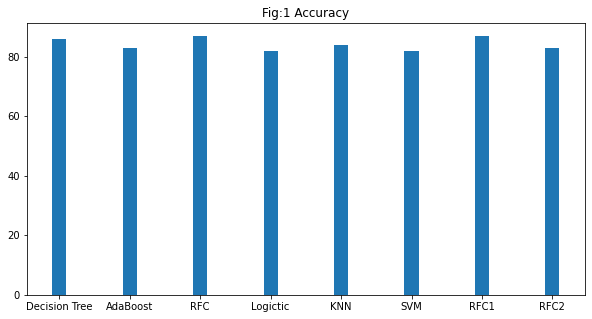

In [56]:
# creating the dataset
data = {'Decision Tree':86, 'AdaBoost':83, 'RFC':87, 'Logictic':82, 'KNN':84, 'SVM':82, 'RFC1':87, 'RFC2': 83}
algorithm = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
plt.title("Fig:1 Accuracy") 

# creating the bar plot
plt.bar(algorithm, values, width = 0.2)
plt.show()

([<matplotlib.axis.XTick at 0x7faf3bef4190>,
 [Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Random Forest'),
  Text(0, 0, 'Logistic'),
  Text(0, 0, 'KNN'),
  Text(0, 0, 'SVM'),
  Text(0, 0, 'RFC_1'),
  Text(0, 0, 'RFC_2')])

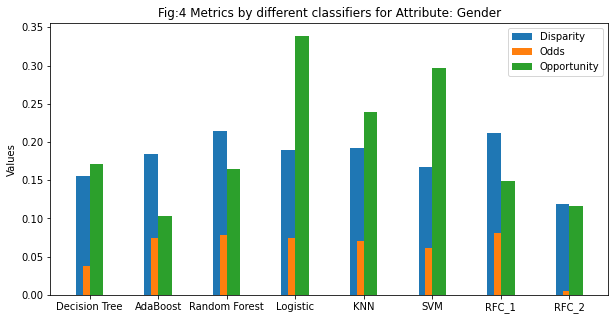

In [57]:
labels = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Logistic', 'KNN', 'SVM','RFC_1','RFC_2']
disparityGender = [dt_demographicParityGender,adaBoost_demographicParityGender, rf_demographicParityGender, logistic_demographicParityGender,knn_demographicParityGender,svm_demographicParityGender,rf_demographicParityGender_filtered1,rf_demographicParityGender_filtered2]
equalityOpportunityGender = [dtOpportunityGender,abOpportunityGender,rfOpportunityGender,logOpportunityGender,knnOpportunityGender,svmOpportunityGender,rfOpportunityGender_filter1,rfOpportunityGender_filter2]
equalityOddsGender = [dtOddsAttributeGender[1],abOddsAttributeGender[1],rfOddsAttributeGender[1],logOddsAttributeGender[1],knnOddsAttributeGender[1],svmOddsAttributeGender[1],rfOddsAttributeGender_filter1[1],rfOddsAttributeGender_filter2[1]]

plt.figure(figsize=(10, 5))
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

plt.bar(x - width/2, height = disparityGender, width=width, label='Disparity')
plt.bar(x, height = equalityOddsGender, width=width, label='Odds')
plt.bar(x + width/2, height = equalityOpportunityGender, width=width, label='Opportunity')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Values')
plt.title('Fig:4 Metrics by different classifiers for Attribute: Gender')
plt.legend()
plt.xticks(ticks=x,labels=labels)

([<matplotlib.axis.XTick at 0x7faf3be23e50>,
 [Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Random Forest'),
  Text(0, 0, 'Logistic'),
  Text(0, 0, 'KNN'),
  Text(0, 0, 'SVM'),
  Text(0, 0, 'RFC_1'),
  Text(0, 0, 'RFC_2')])

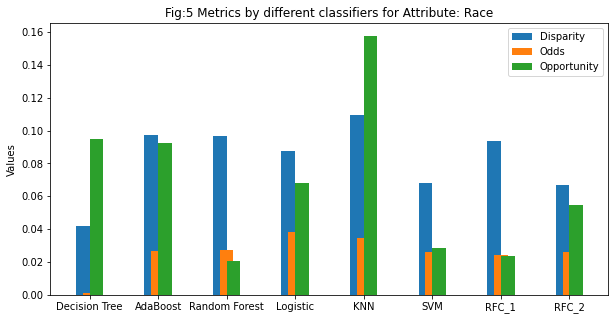

In [58]:
labels = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Logistic', 'KNN', 'SVM','RFC_1','RFC_2']
disparityRace = [dt_demographicParityRace,adaBoost_demographicParityRace, rf_demographicParityRace, logistic_demographicParityRace,knn_demographicParityRace,svm_demographicParityRace,rf_demographicParityRace_filtered1,rf_demographicParityRace_filtered2]
equalityOpportunityRace = [dtOpportunityRace,abOpportunityRace,rfOpportunityRace,logOpportunityRace,knnOpportunityRace,svmOpportunityRace,rfOpportunityRace_filter1,rfOpportunityRace_filter2]
equalityOddsRace = [dtOddsAttributeRace[1],abOddsAttributeRace[1],rfOddsAttributeRace[1],logOddsAttributeRace[1],knnOddsAttributeRace[1],svmOddsAttributeRace[1],rfOddsAttributeRace_filter1[1],rfOddsAttributeRace_filter2[1]]

plt.figure(figsize=(10, 5))
x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

plt.bar(x - width/2, height = disparityRace, width=width, label='Disparity')
plt.bar(x, height = equalityOddsRace, width=width, label='Odds')
plt.bar(x + width/2, height = equalityOpportunityRace, width=width, label='Opportunity')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Values')
plt.title('Fig:5 Metrics by different classifiers for Attribute: Race')
plt.legend()
plt.xticks(ticks=x,labels=labels)

([<matplotlib.axis.XTick at 0x7faf3bd6fe50>,
 [Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Random Forest'),
  Text(0, 0, 'Logistic'),
  Text(0, 0, 'KNN'),
  Text(0, 0, 'SVM'),
  Text(0, 0, 'RFC_1'),
  Text(0, 0, 'RFC_2')])

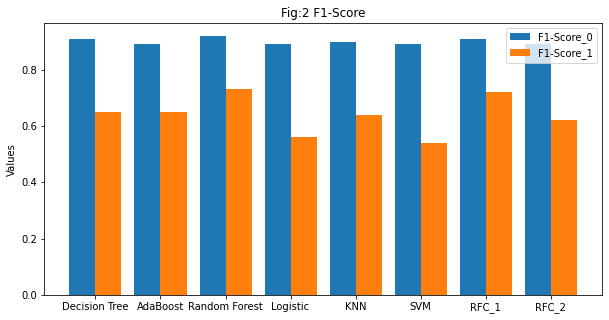

In [59]:
labels = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Logistic', 'KNN', 'SVM','RFC_1','RFC_2']
f1Score0 = [0.91,0.89,0.92,0.89,0.90,0.89,0.91,0.89]
f1Score1 = [0.65,0.65,0.73,0.56,0.64,0.54,0.72,0.62]

plt.figure(figsize=(10, 5))
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

plt.bar(x - width/2, height = f1Score0, width=width, label='F1-Score_0')
plt.bar(x + width/2, height = f1Score1, width=width, label='F1-Score_1')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Values')
plt.title('Fig:2 F1-Score')
plt.legend()
plt.xticks(ticks=x,labels=labels)

([<matplotlib.axis.XTick at 0x7faf3bd0dc10>,
 [Text(0, 0, 'Decision Tree'),
  Text(0, 0, 'AdaBoost'),
  Text(0, 0, 'Random Forest'),
  Text(0, 0, 'Logistic'),
  Text(0, 0, 'KNN'),
  Text(0, 0, 'SVM'),
  Text(0, 0, 'RFC_1'),
  Text(0, 0, 'RFC_2')])

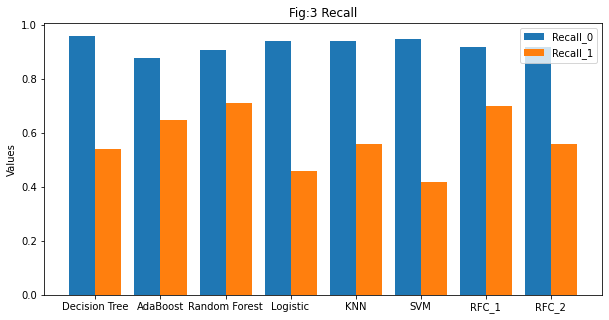

In [60]:
labels = ['Decision Tree', 'AdaBoost', 'Random Forest', 'Logistic', 'KNN', 'SVM','RFC_1','RFC_2']
recallScore0 = [0.96,0.88,0.91,0.94,0.94,0.95,0.92,0.92]
recallScore1 = [0.54,0.65,0.71,0.46,0.56,0.42,0.70,0.56]

plt.figure(figsize=(10, 5))
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

plt.bar(x - width/2, height = recallScore0, width=width, label='Recall_0')
plt.bar(x + width/2, height = recallScore1, width=width, label='Recall_1')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Values')
plt.title('Fig:3 Recall')
plt.legend()
plt.xticks(ticks=x,labels=labels)

#Test Data Prediction

In [61]:
testData = pd.read_csv('test.csv', skipinitialspace = True)
testData.replace("?", '0', inplace = True)
testData

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,0,Some-college,10,Never-married,0,Own-child,White,Female,0,0,30,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States
16277,64,0,HS-grad,9,Widowed,0,Other-relative,Black,Male,0,0,40,United-States
16278,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States
16279,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States


In [62]:
testData.isnull().values.any()

False

In [63]:
testData = testData.drop(['education'], axis=1)
testData['race'] = [1 if r=='White' else 0 for r in testData['race']]
testData['sex'] = [1 if r=='Male' else 0 for r in testData['sex']]
testData.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,0,1,0,0,40,United-States
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,1,1,0,0,50,United-States
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,1,1,0,0,40,United-States
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,0,1,7688,0,40,United-States
4,18,0,10,Never-married,0,Own-child,1,0,0,0,30,United-States


In [64]:
oe1 = OrdinalEncoder()
testData[['workclass','marital-status','occupation','relationship','native-country']] = oe1.fit_transform(testData[['workclass','marital-status','occupation','relationship','native-country']])
testData = testData.astype(np.int64)
testData.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,7,4,7,3,0,1,0,0,40,38
1,38,4,9,2,5,0,1,1,0,0,50,38
2,28,2,12,2,11,0,1,1,0,0,40,38
3,44,4,10,2,7,0,0,1,7688,0,40,38
4,18,0,10,4,0,3,1,0,0,0,30,38


In [65]:
testData_reduced = scaler.transform(testData)
pd.DataFrame(testData_reduced)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.993582,0.085958,-1.197374,0.921379,0.100060,0.967552,-2.412142,0.705536,-0.145402,-0.216957,-0.031647,0.165443
1,-0.040069,0.085958,-0.421024,-0.408863,-0.373277,-0.899940,0.414569,0.705536,-0.145402,-0.216957,0.776930,0.165443
2,-0.773540,-1.290757,0.743503,-0.408863,1.046732,-0.899940,0.414569,0.705536,-0.145402,-0.216957,-0.031647,0.165443
3,0.400015,0.085958,-0.032848,-0.408863,0.100060,-0.899940,-2.412142,0.705536,0.902524,-0.216957,-0.031647,0.165443
4,-1.507012,-2.667471,-0.032848,0.921379,-1.556617,0.967552,0.414569,-1.417362,-0.145402,-0.216957,-0.840223,0.165443
...,...,...,...,...,...,...,...,...,...,...,...,...
16276,0.033279,0.085958,1.131678,-1.739105,0.810064,-0.277443,0.414569,-1.417362,-0.145402,-0.216957,-0.355077,0.165443
16277,1.866958,-2.667471,-0.421024,2.251621,-1.556617,0.345055,-2.412142,0.705536,-0.145402,-0.216957,-0.031647,0.165443
16278,-0.040069,0.085958,1.131678,-0.408863,0.810064,-0.899940,0.414569,0.705536,-0.145402,-0.216957,0.776930,0.165443
16279,0.400015,0.085958,1.131678,-1.739105,-1.319949,0.967552,-2.412142,0.705536,0.598151,-0.216957,-0.031647,0.165443


In [66]:
rf_output = randomForest.predict(testData_reduced)
rf_output

array([0, 0, 0, ..., 1, 0, 1])

In [67]:
sentimentFileWriter = open("output.txt", "w")
sentimentFileWriter.writelines("%s\n" % sentiment for sentiment in rf_output)
sentimentFileWriter.close()

In [68]:
pd.DataFrame(rf_output).value_counts()

0    12716
1     3565
dtype: int64

# Analyzing Test Data by removing sensitive and correlated features 

In [69]:
testData_filtered = testData.drop(['marital-status','occupation','relationship','race','sex'],axis=1)
testData_filtered.head()

,age,workclass,education-num,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,7,0,0,40,38
1,38,4,9,0,0,50,38
2,28,2,12,0,0,40,38
3,44,4,10,7688,0,40,38
4,18,0,10,0,0,30,38


In [70]:
testData_reduced_filtered = scaler_filtered2.transform(testData_filtered)
pd.DataFrame(testData_reduced_filtered)

,0,1,2,3,4,5,6
0,-0.993582,0.085958,-1.197374,-0.145402,-0.216957,-0.031647,0.165443
1,-0.040069,0.085958,-0.421024,-0.145402,-0.216957,0.776930,0.165443
2,-0.773540,-1.290757,0.743503,-0.145402,-0.216957,-0.031647,0.165443
3,0.400015,0.085958,-0.032848,0.902524,-0.216957,-0.031647,0.165443
4,-1.507012,-2.667471,-0.032848,-0.145402,-0.216957,-0.840223,0.165443
...,...,...,...,...,...,...,...
16276,0.033279,0.085958,1.131678,-0.145402,-0.216957,-0.355077,0.165443
16277,1.866958,-2.667471,-0.421024,-0.145402,-0.216957,-0.031647,0.165443
16278,-0.040069,0.085958,1.131678,-0.145402,-0.216957,0.776930,0.165443
16279,0.400015,0.085958,1.131678,0.598151,-0.216957,-0.031647,0.165443


In [71]:
predictions_filtered = randomForestFiltered2.predict(testData_reduced_filtered)
sentimentFileWriter = open("output_filtered.txt", "w")
sentimentFileWriter.writelines("%s\n" % sentiment for sentiment in predictions_filtered)
sentimentFileWriter.close()

# Tried Feature Selection, accuracy did not improve

In [72]:
#using chi2, accuracy does not increase
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ch = SelectKBest(chi2, k=5)
X_train_reduced12 = ch.fit_transform(X_train, y_train)
X_test_reduced12 = ch.transform(X_test)
pd.DataFrame(X_train_reduced)

,0,1,2,3,4
0,46,4,0,0,38
1,63,1,0,0,20
2,22,3,0,0,30
3,24,0,0,0,40
4,35,0,0,0,40
...,...,...,...,...,...
27671,47,0,0,0,40
27672,31,4,0,0,21
27673,18,3,0,0,20
27674,50,0,0,0,84


In [73]:
#using PCA, accuracy does not increase
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
pd.DataFrame(X_train_reduced)

,0,1,2
0,-1066.572973,-89.113184,6.695200
1,-1066.572540,-89.105265,18.156097
2,-1066.577238,-89.171601,-18.350177
3,-1066.575719,-89.151274,-13.582232
4,-1066.574282,-89.130919,-3.076523
...,...,...,...
27671,-1066.572312,-89.103925,8.499616
27672,-1066.577243,-89.170859,-12.351230
27673,-1066.579434,-89.201061,-25.179196
27674,-1066.566395,-89.025702,23.787649


In [74]:
# feature selection using SVD, accuracy does not increase
svd_trunc = TruncatedSVD(n_components=3, random_state=27, n_iter = 30)
X_train_reduced = svd_trunc.fit_transform(X_train, y_train)
X_test_reduced = svd_trunc.transform(X_test)
pd.DataFrame(X_train_reduced).head()

,0,1,2
0,0.106389,2.730181,71.705798
1,0.106142,2.719226,71.242149
2,0.072647,1.870602,49.242708
3,0.088165,2.271707,59.848314
4,0.089259,2.281916,59.760437


# Oversampling did not improve accuracy or recall


In [75]:
from imblearn.over_sampling import SMOTENC
smotenc = SMOTENC([1,2,3,4,5,6,7,11],random_state = 101)
X_train, y_train = smotenc.fit_resample(X_train, y_train)

In [76]:
y_train.value_counts()

0    21037
1    21037
Name: income, dtype: int64